# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv, IRPEnv
from agents.ff_sdp_agent import SDPAgentFF

import torch


## Train the agent

In [2]:
batch_size = 3
seed = 123
num_nodes = 7

num_epochs = 2001
# num_epochs = 251
lr=1E-4
gamma = 0.99
dropout_rate = 0.2
hidden_dim=1024


# Instantiate the SantaIRPEnv environment
env_santa_ff = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)

# Instantiate the TSPAgentFF (assuming it's compatible with SantaIRPEnv)
agent_santa_ff = SDPAgentFF(node_dim=num_nodes,hidden_dim=hidden_dim,lr=lr,gamma=gamma,dropout_rate=dropout_rate,
    seed=seed, csv_path=f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv",
)

# Train the agent
agent_santa_ff.train(
    env_santa_ff,
    episodes=num_epochs,
    check_point_dir=f"./check_points/santa_ff_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Episode 50 finished - Loss: 14.41169261932373
INFO:root:Episode 100 finished - Loss: 8.216909408569336
INFO:root:Episode 150 finished - Loss: 14.539360046386719
INFO:root:Episode 200 finished - Loss: 5.258209228515625
INFO:root:Episode 250 finished - Loss: 4.884291648864746


Epoch 00281: reducing learning rate of group 0 to 1.0000e-05.


INFO:root:Episode 300 finished - Loss: 7.360573768615723
INFO:root:Episode 350 finished - Loss: 5.1400651931762695
INFO:root:Episode 400 finished - Loss: 10.141850471496582
INFO:root:Episode 450 finished - Loss: 6.803038597106934


Epoch 00482: reducing learning rate of group 0 to 1.0000e-06.


INFO:root:Episode 500 finished - Loss: 5.573314189910889
INFO:root:Episode 550 finished - Loss: 4.204010486602783
INFO:root:Episode 600 finished - Loss: 4.433726787567139
INFO:root:Episode 650 finished - Loss: 7.2496113777160645
INFO:root:Episode 700 finished - Loss: 10.382207870483398
INFO:root:Episode 750 finished - Loss: 5.332512378692627
INFO:root:Episode 800 finished - Loss: 7.758338451385498
INFO:root:Episode 850 finished - Loss: 4.529170036315918
INFO:root:Episode 900 finished - Loss: 6.317431926727295
INFO:root:Episode 950 finished - Loss: 4.50522518157959
INFO:root:Episode 1000 finished - Loss: 9.829909324645996
INFO:root:Episode 1050 finished - Loss: 5.431122779846191
INFO:root:Episode 1100 finished - Loss: 6.9250078201293945
INFO:root:Episode 1150 finished - Loss: 4.539577007293701
INFO:root:Episode 1200 finished - Loss: 5.51242733001709
INFO:root:Episode 1250 finished - Loss: 5.346708297729492
INFO:root:Episode 1300 finished - Loss: 5.189325332641602
INFO:root:Episode 1350 

## Visualise the actions of the agent in the environments

In [3]:
#env = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)
env = env_santa_ff
env.reset()
TSPModel=f'./check_points/tsp_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt'

In [4]:
# Setup for evaluation
env.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_ff_{num_nodes}_{seed}.mp4"
)

In [5]:
# agent = SDPAgentFF(seed=seed)
agent_santa_ff.model.load_state_dict(torch.load(f"./check_points/santa_ff_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

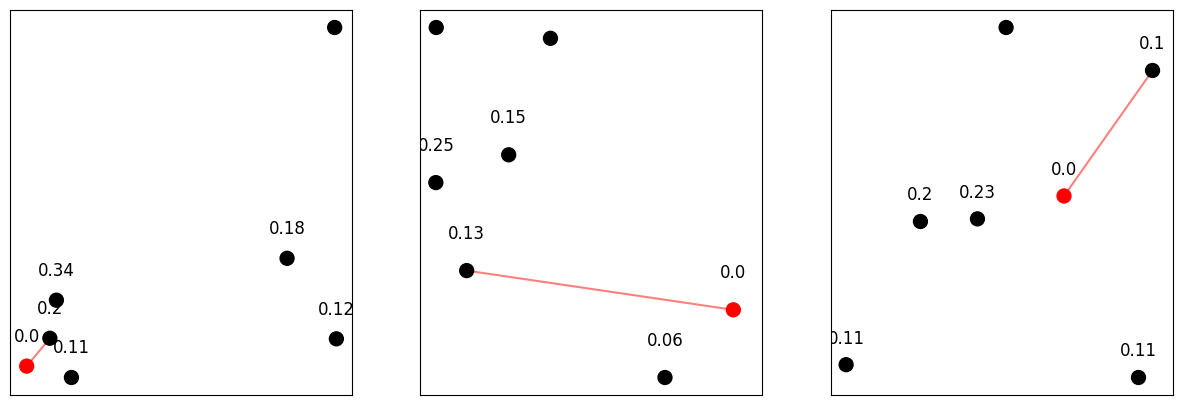

<Figure size 640x480 with 0 Axes>

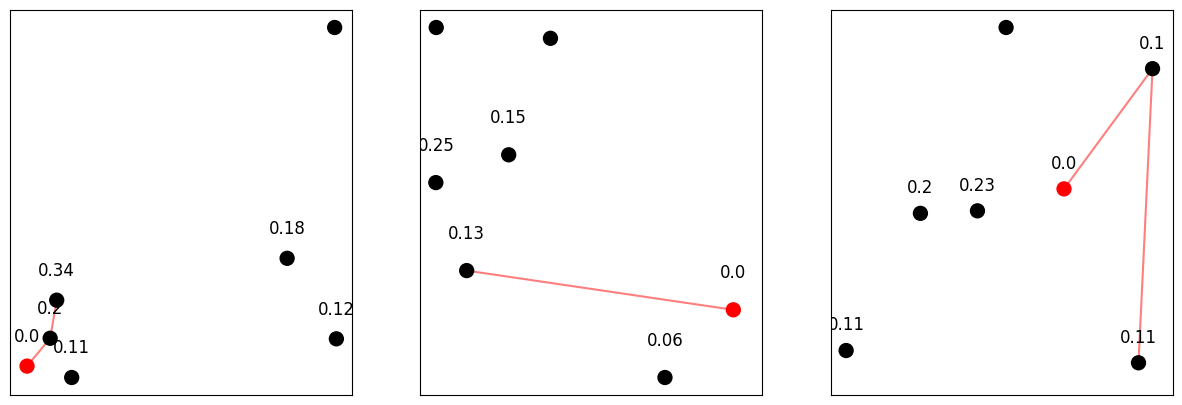

<Figure size 640x480 with 0 Axes>

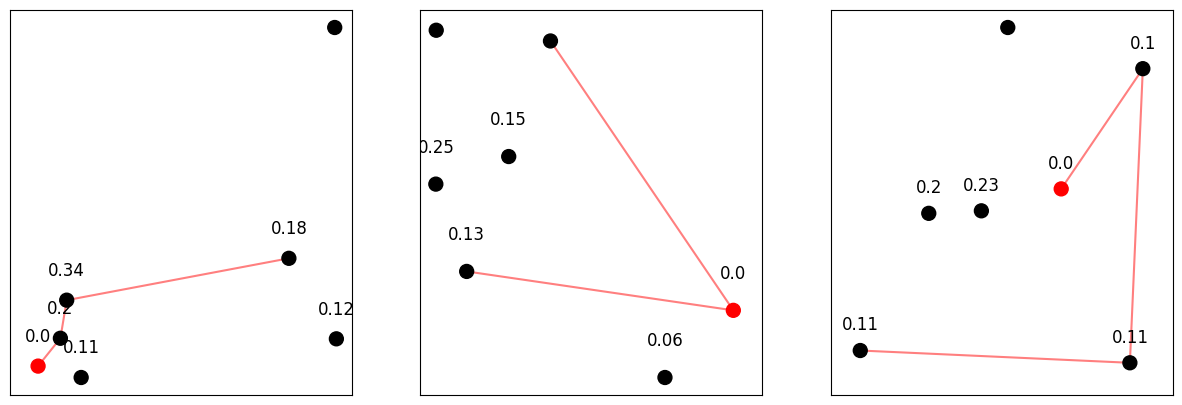

<Figure size 640x480 with 0 Axes>

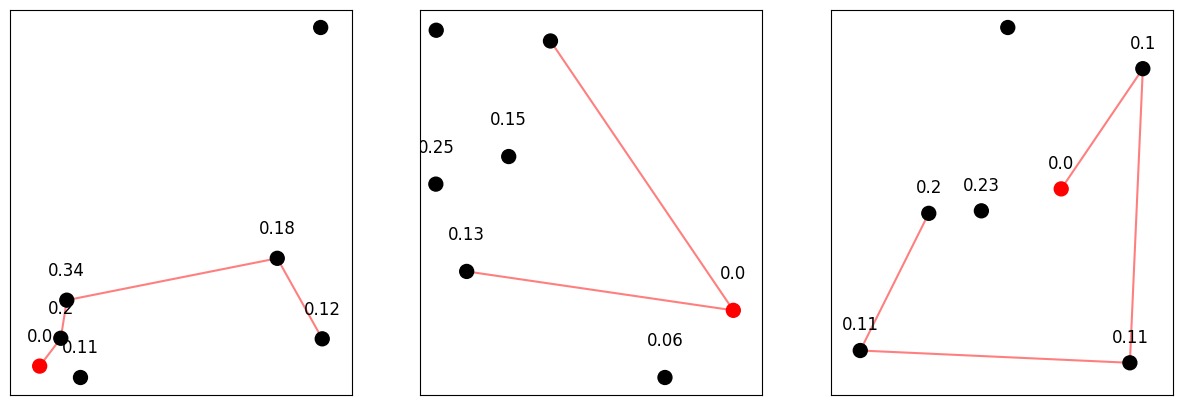

<Figure size 640x480 with 0 Axes>

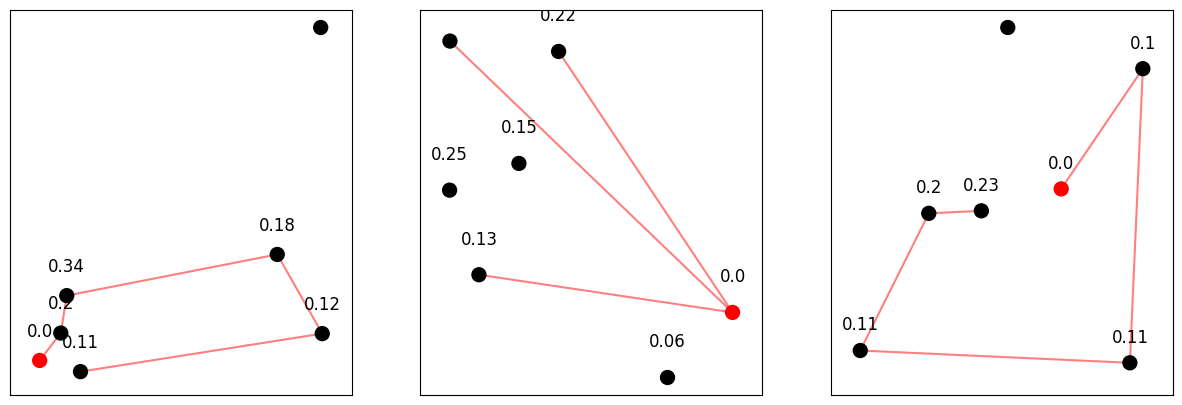

<Figure size 640x480 with 0 Axes>

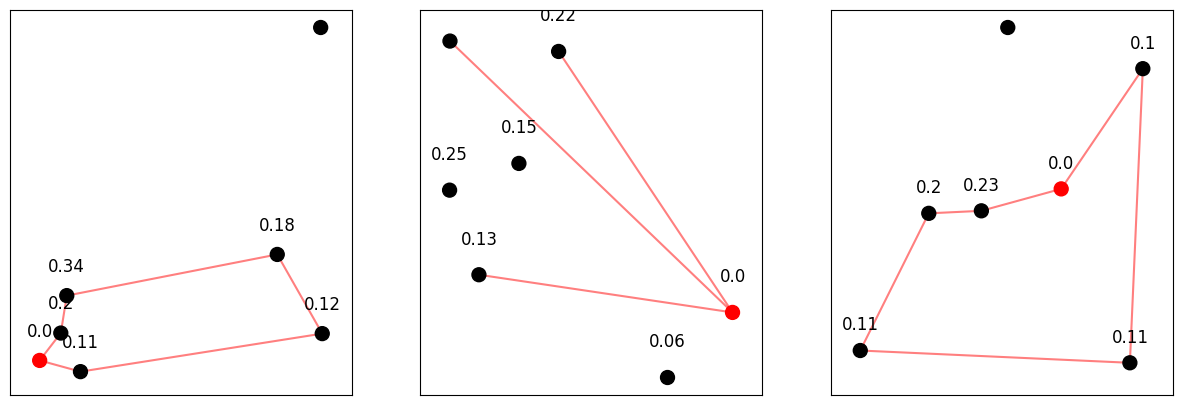

<Figure size 640x480 with 0 Axes>

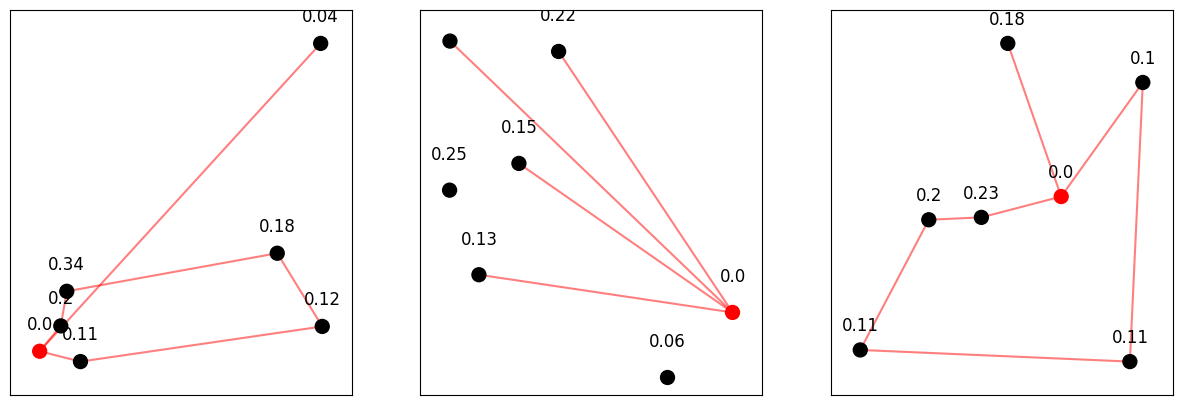

<Figure size 640x480 with 0 Axes>

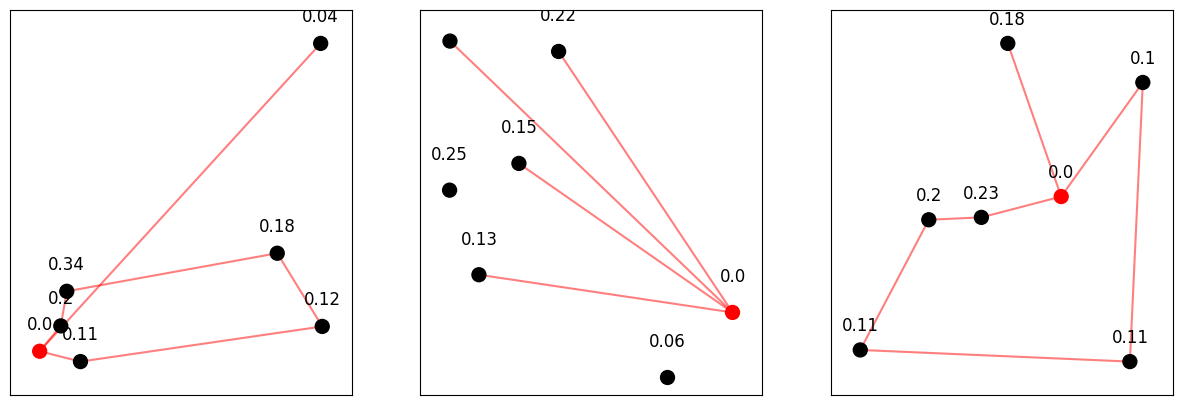

<Figure size 640x480 with 0 Axes>

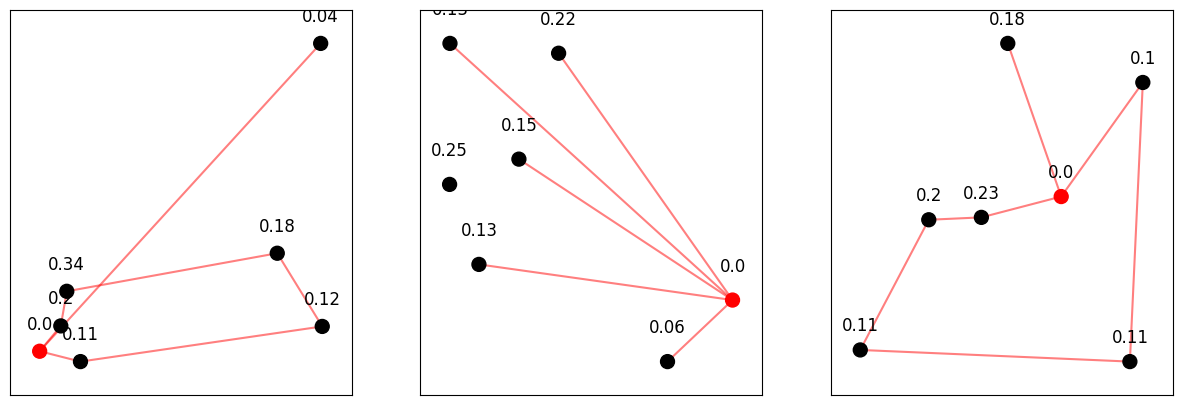

<Figure size 640x480 with 0 Axes>

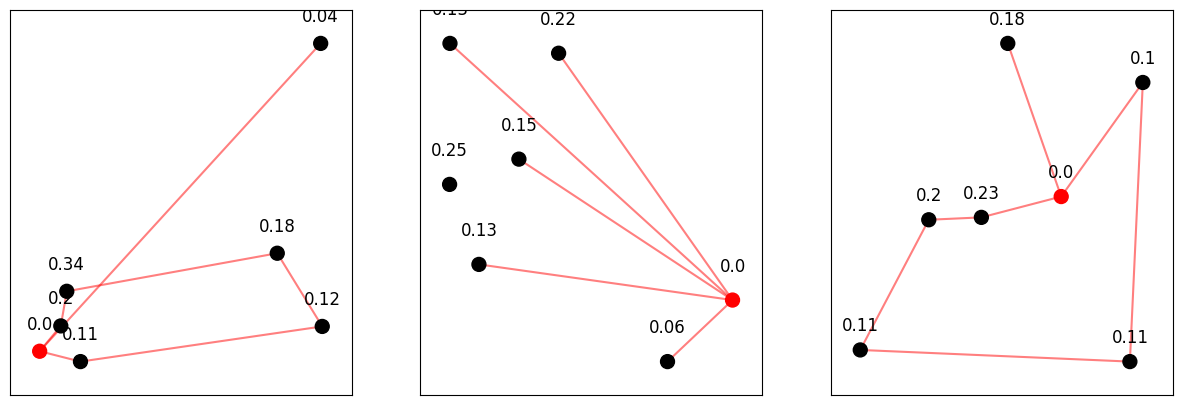

<Figure size 640x480 with 0 Axes>

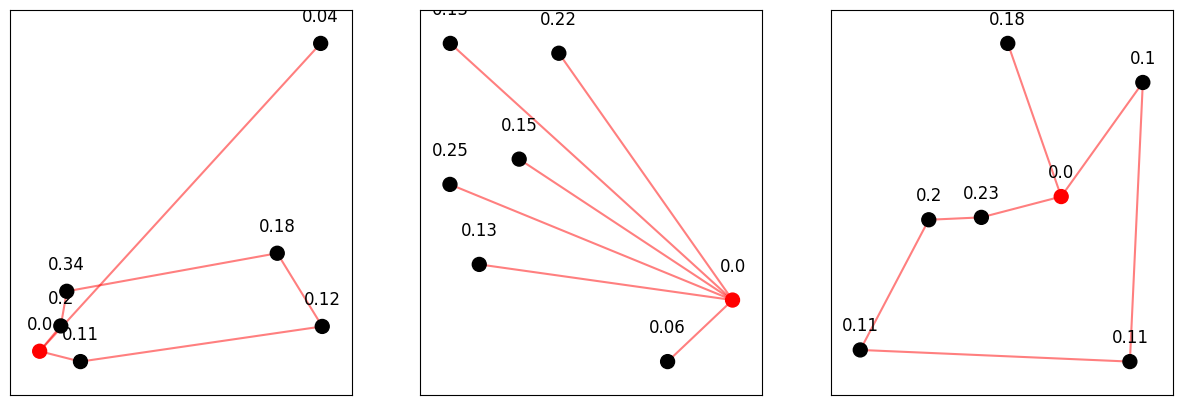

In [6]:
# Evaluate the agent
loss_a = agent_santa_ff.evaluate(env)

In [7]:
# Close the video recorder
env.vid.close()

In closing function
Environment closing
Moviepy - Building video ./videos/video_test_santa_ff_7_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_123.mp4


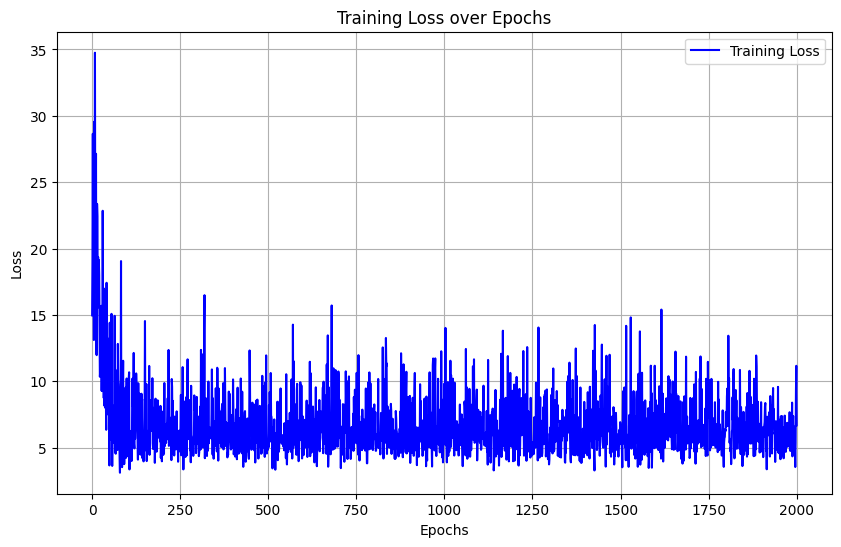

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
